# 5. SVM Algorithm

In [1]:
# Import pandas library for data manipulation
import pandas as pd

# Import numpy library for numerical operations  
import numpy as np  

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import seaborn for data visualization
import seaborn as sns

# Import the train_test_split function for splitting the data into train and test sets
from sklearn.model_selection import train_test_split

# Import the accuracy_score function for evaluating the model's performance
from sklearn.metrics import accuracy_score,confusion_matrix

# Import the Support Vector Classification (SVC) class from scikit-learn
from sklearn.svm import SVC



In [2]:
# Read the CSV file 'milk.csv' into a pandas DataFrame 'df'
df = pd.read_csv("milkdata.csv")
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [3]:
# Shows a tuple with row and column size
df.shape

(1059, 8)

In [4]:
# Returns the first few rows of the DataFrame df
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
# Check for missing values (NaNs) in each column of the DataFrame 'df' and compute their sum
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [6]:
# Gives the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [7]:
# gives basic statistics of the dataset
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


## Five Interesting Insights from Dataset

### 1.pH vs. Milk Grade Quality
Milk with low pH (<6.5) tends to be sour and of lower quality. Checking the average pH per grade helps understand how pH affects milk classification.

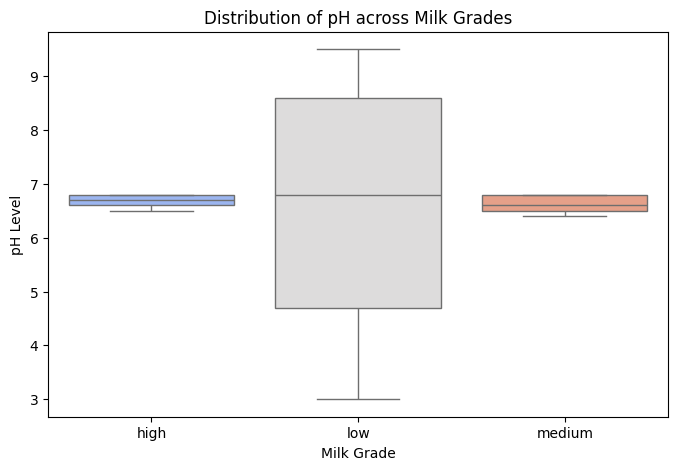

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Grade", y="pH", data=df, hue="Grade", palette="coolwarm")
plt.title("Distribution of pH across Milk Grades")
plt.xlabel("Milk Grade")
plt.ylabel("pH Level")
plt.show()


### 2. Temperature vs. Milk Grade
Higher storage temperatures may accelerate milk spoilage, leading to lower grades.

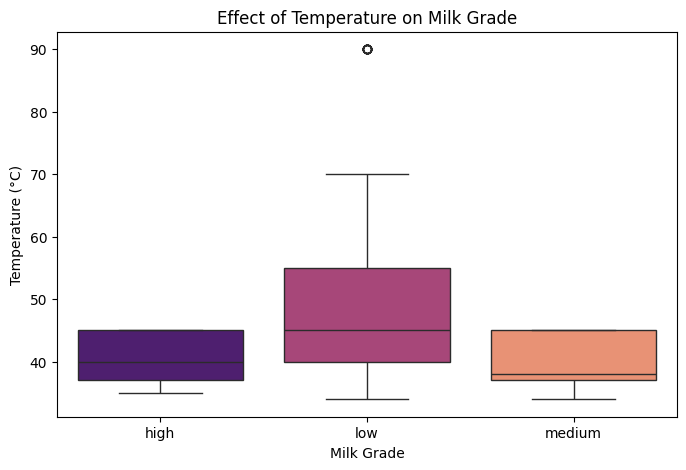

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Grade", y="Temprature", data=df, hue="Grade", palette="magma")
plt.title("Effect of Temperature on Milk Grade")
plt.xlabel("Milk Grade")
plt.ylabel("Temperature (°C)")
plt.show()


### 3.Colour vs. Milk Grade
Milk should be white to slightly yellowish. If the dataset shows colour variations in lower grades, it indicates contamination or degradation.

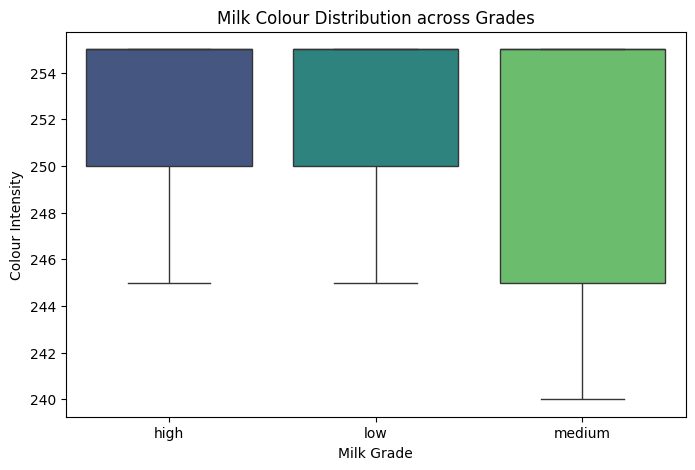

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Grade", y="Colour", data=df, hue="Grade", palette="viridis")
plt.title("Milk Colour Distribution across Grades")
plt.xlabel("Milk Grade")
plt.ylabel("Colour Intensity")
plt.show()



 ### 4.Effect of Fat on Milk Grade
Higher fat content generally means better milk quality.

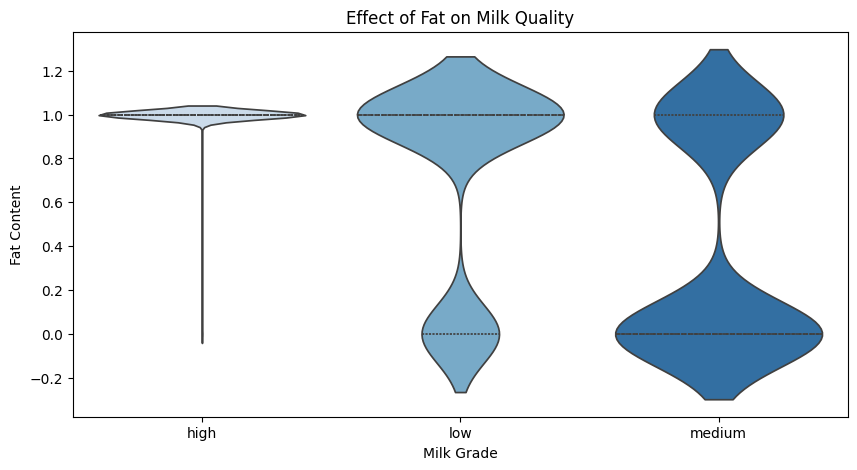

In [11]:
# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

plt.figure(figsize=(10, 5))
sns.violinplot(x="Grade", y="Fat", data=df, hue="Grade", palette="Blues", inner="quart")
plt.title("Effect of Fat on Milk Quality")
plt.xlabel("Milk Grade")
plt.ylabel("Fat Content")
plt.show()



### 5.Turbidity Effect on Milk Grade
High turbidity may indicate contaminants or processing issues leading to lower grades.

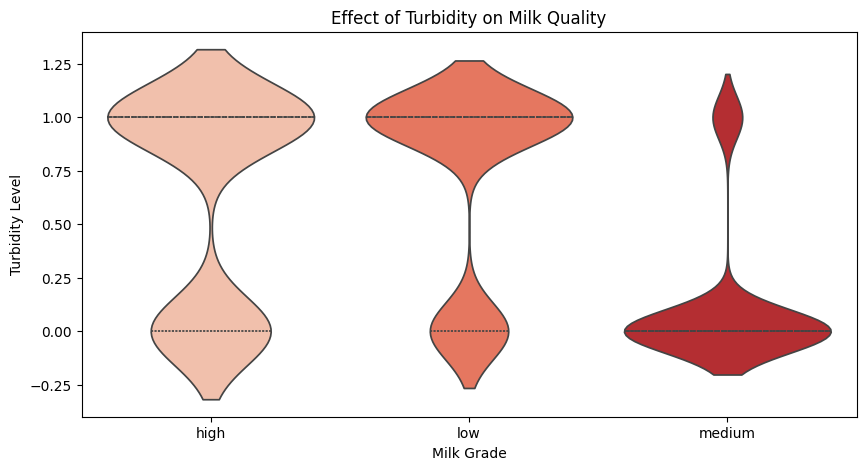

In [12]:
plt.figure(figsize=(10, 5))
sns.violinplot(x="Grade", y="Turbidity", data=df, hue="Grade", palette="Reds", inner="quart", legend=False)
plt.title("Effect of Turbidity on Milk Quality")
plt.xlabel("Milk Grade")
plt.ylabel("Turbidity Level")
plt.show()



In [13]:
# Create a new DataFrame 'x' by dropping the column "Grade" from the original DataFrame 'df'
x = df.drop(columns= "Grade")
x

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [14]:
# Create a Series 'y' containing data from the column "Grade" of the original DataFrame 'df'
y = df["Grade"]
y

0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object

In [15]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [16]:

# Initialize SVM with linear kernel
svm = SVC(kernel='linear')

In [17]:
# Train the model
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [18]:

# Predictions
y_pred = svm.predict(x_test)

In [19]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8018867924528302


In [20]:
cm = confusion_matrix( y_test, y_pred)
cm

array([[70, 13,  3],
       [17, 97,  2],
       [22,  6, 88]])